## Customer Churn Prediction
---
This Jupyter notebook presents a step-by-step approach to predicting customer churn using Artificial Neural Networks (ANN) with the TELCO dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.dropna(inplace=True)

In [7]:
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [8]:
df.duplicated().sum()

22

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe(include="category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,5869,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


In [11]:
light_blue_color = '#ADD8E6'
light_pink_color = '#FFB6C1'
light_green_color = '#BDFCC9'
light_purple_color = '#DAC4F7'

palette = [light_blue_color, light_pink_color, light_green_color, light_purple_color]

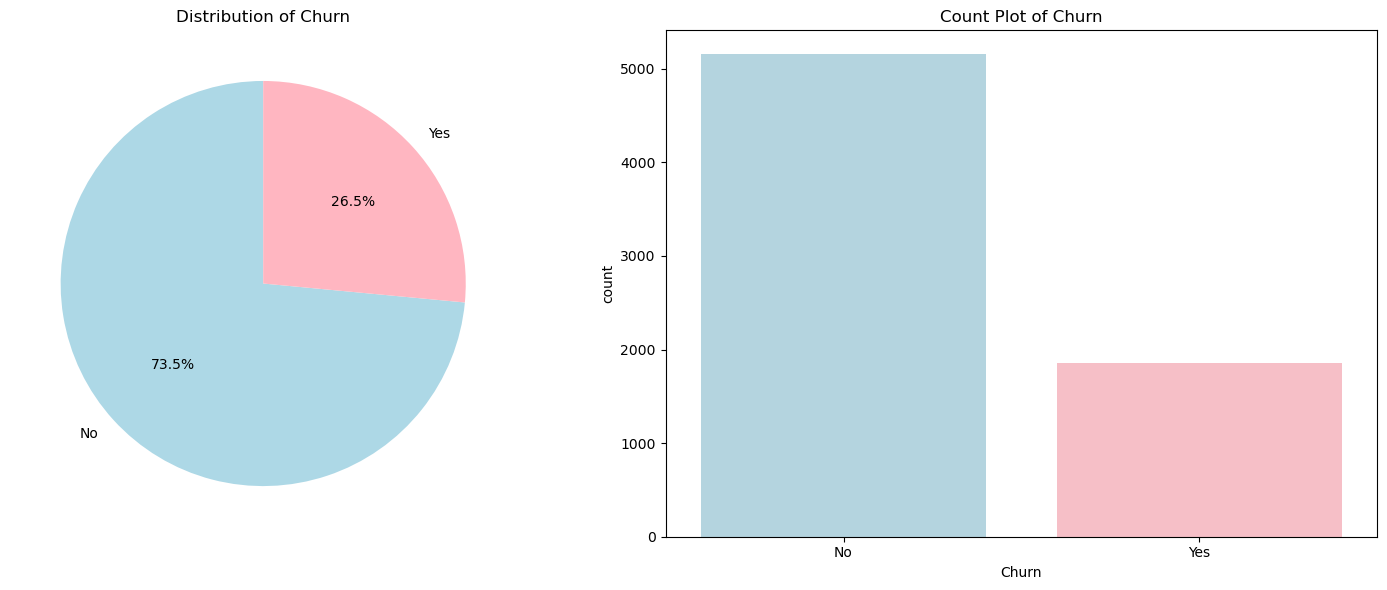

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = df['Churn'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=[light_blue_color, light_pink_color])
axes[0].set_title('Distribution of Churn')
sns.countplot(x='Churn', data=df, palette=[light_blue_color, light_pink_color], ax=axes[1])
axes[1].set_title('Count Plot of Churn')

plt.tight_layout()
plt.show()

In [13]:
customer_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
billing_info = ["Contract", "PaperlessBilling", "PaymentMethod"]

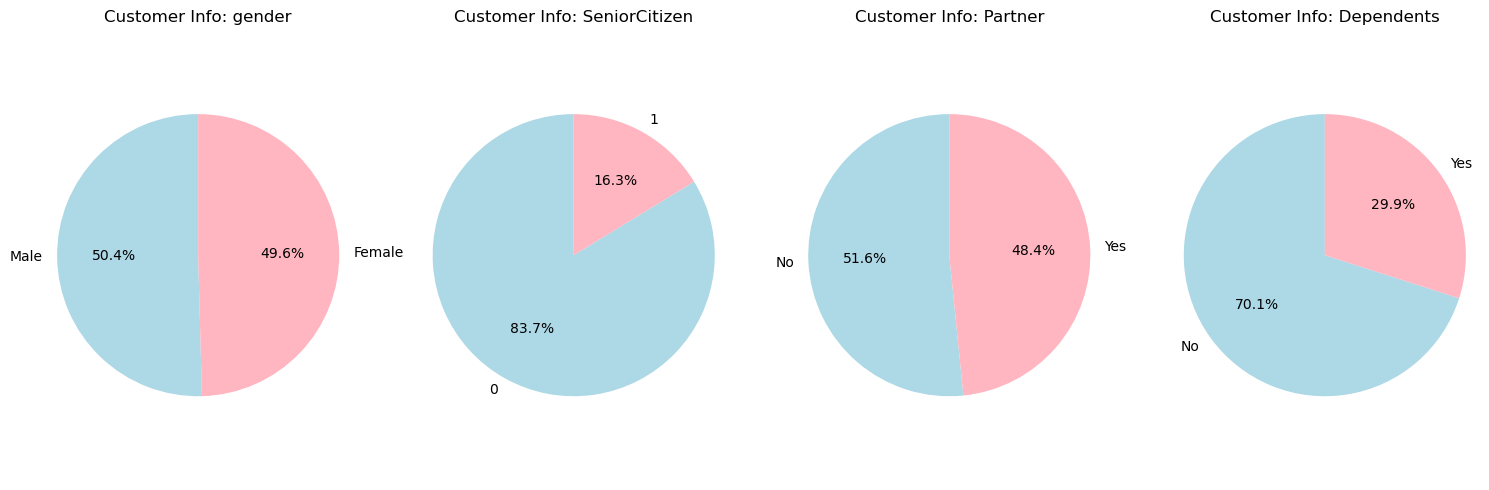

In [14]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(customer_info, 1):
    plt.subplot(1, 4, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Customer Info: {col}')
    plt.axis('equal')  
plt.tight_layout()
plt.show()

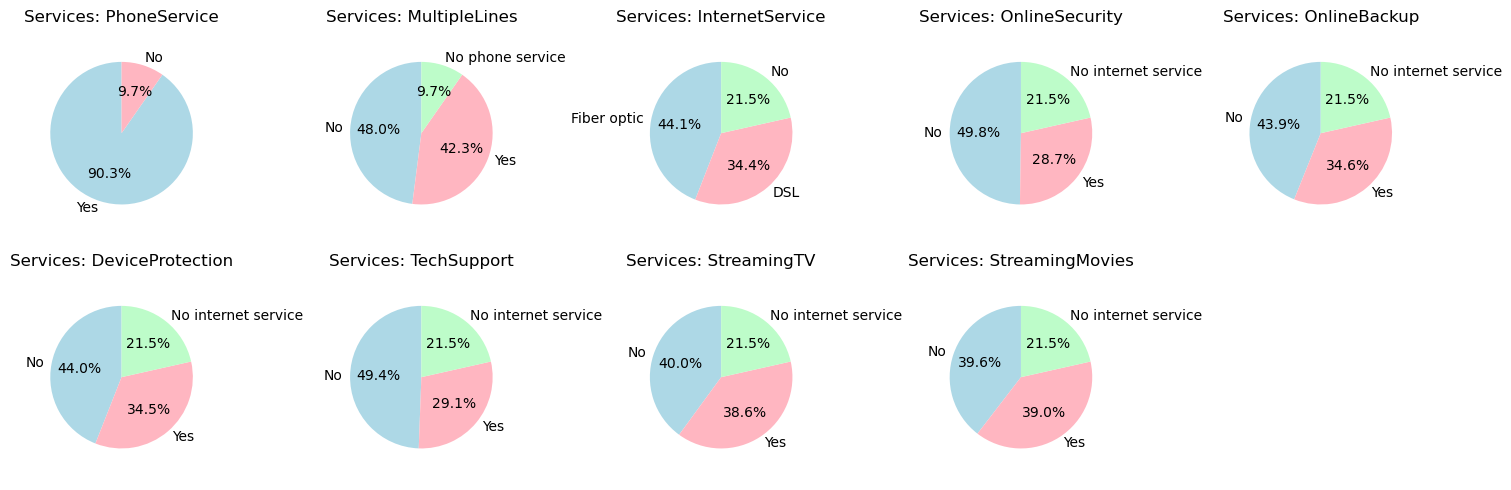

In [15]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(services, 1):
    plt.subplot(2, 5, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Services: {col}')
    plt.axis('equal') 
plt.tight_layout()
plt.show()

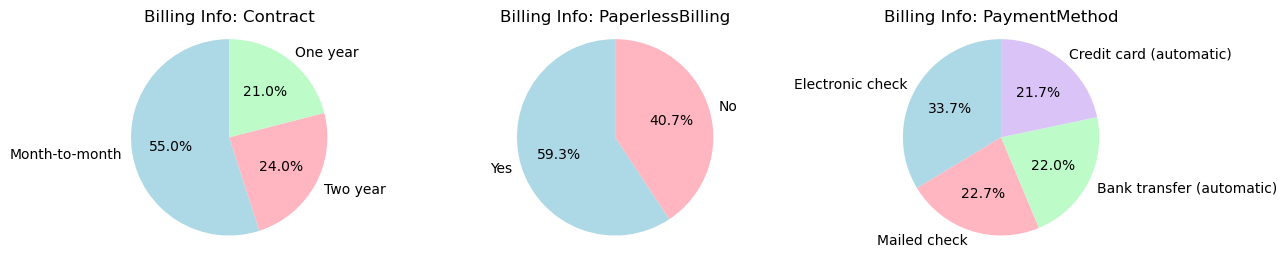

In [16]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(billing_info, 1):
    plt.subplot(2, 4, i)
    if col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
        sns.histplot(df[col], kde=True, color=light_blue_color)
        plt.title(f'Billing Info: {col}')
    else:
        counts = df[col].value_counts(normalize=True)
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
        plt.title(f'Billing Info: {col}')
        plt.axis('equal')  
plt.tight_layout()
plt.show()

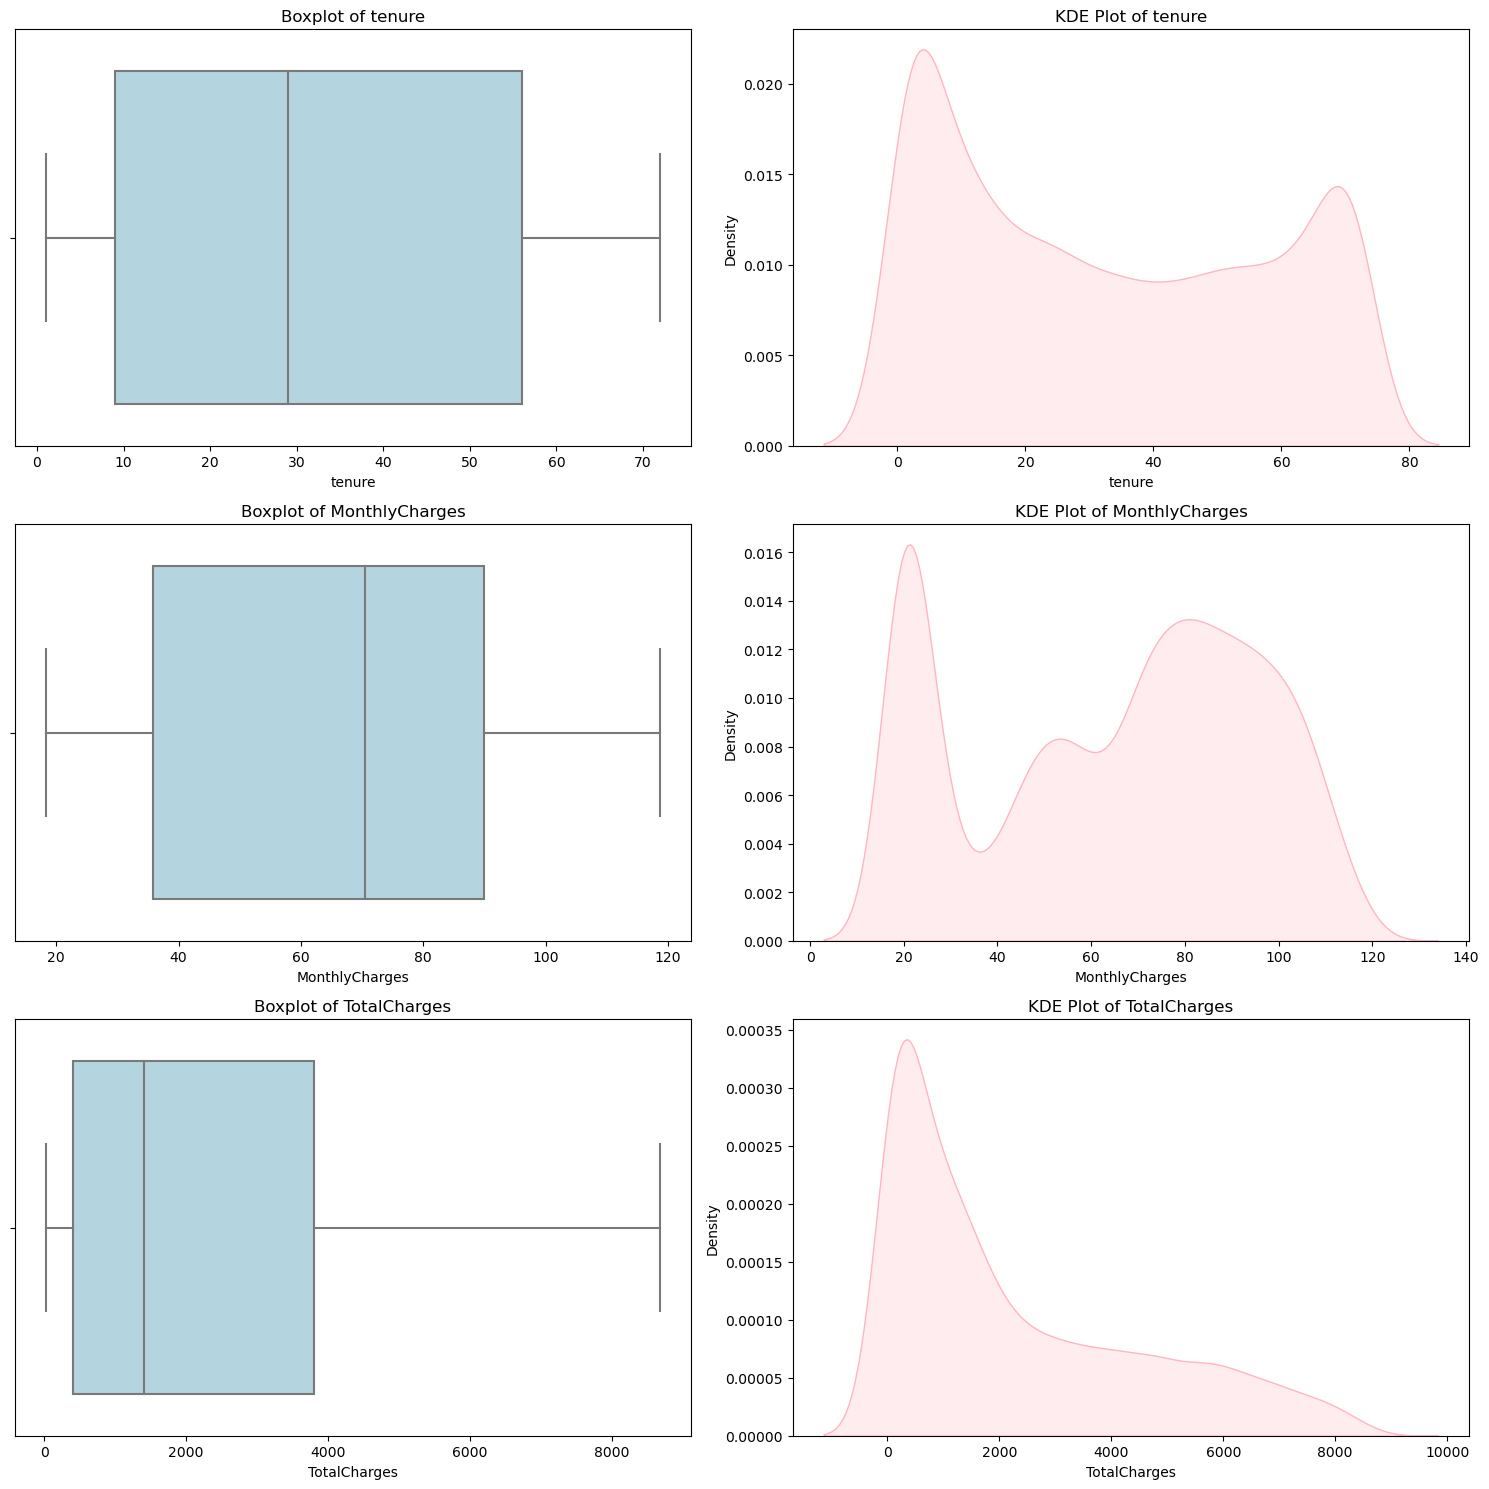

In [17]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    sns.boxplot(x=df[column], ax=axes[i, 0], color=light_blue_color)
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
    
    sns.kdeplot(data=df[column], ax=axes[i, 1], color=light_pink_color, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

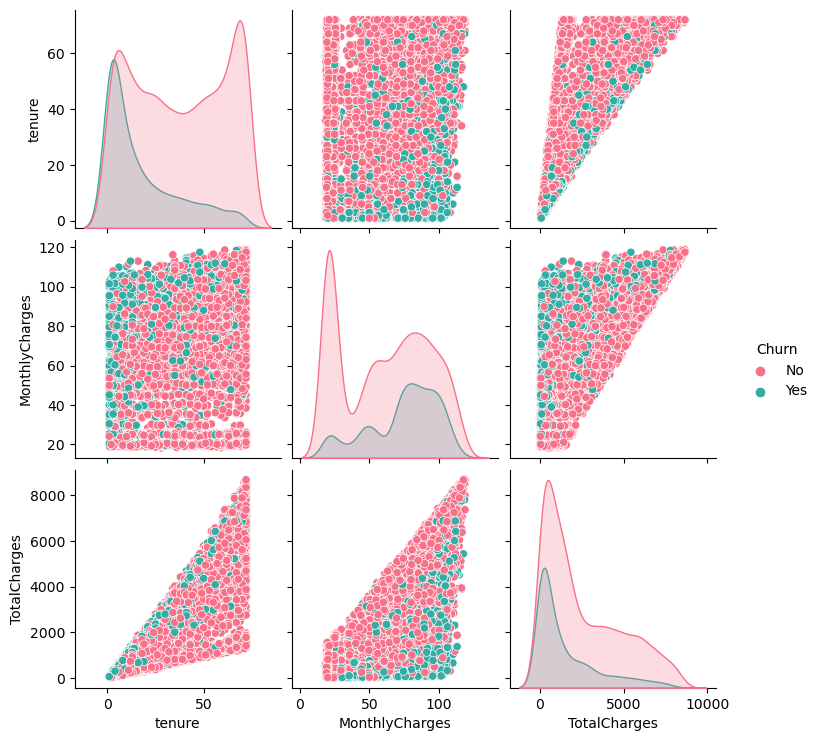

In [18]:
sns.pairplot(df, hue='Churn', palette='husl')

plt.show()

In [19]:
df = pd.get_dummies(df, columns=categorical_cols)

In [20]:
df = df [['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
        'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
        'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
        'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']]

In [21]:
X = df.drop('Churn_Yes', axis='columns')
y = df['Churn_Yes']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
print(X_train.shape, X_test.shape)

(5608, 25) (1402, 25)


In [31]:
model = keras.Sequential ([
    keras.layers.Dense(25, input_shape=(25,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),  
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7179 - loss: 5.8409
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7749 - loss: 0.5115
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7860 - loss: 0.5104
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7540 - loss: 0.6512
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7800 - loss: 0.5241
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.5263
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7889 - loss: 0.4854
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8086 - loss: 0.4365
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7778 - loss: 0.5978
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7771 - loss: 0.5245
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4784
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4234
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4433
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7945 - loss: 0.4293
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - loss: 0.4212
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4309
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8016 - loss: 0.4330
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4181
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8066 - loss: 0.4313
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4163
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - loss: 0.4134
Epoch 78/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.4186
Epoch 79/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [32]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.4522


[0.4498637914657593, 0.7881597876548767]

In [33]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [34]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1014
           1       0.61      0.64      0.62       388

    accuracy                           0.79      1402
   macro avg       0.74      0.74      0.74      1402
weighted avg       0.79      0.79      0.79      1402



Text(45.722222222222214, 0.5, 'Truth')

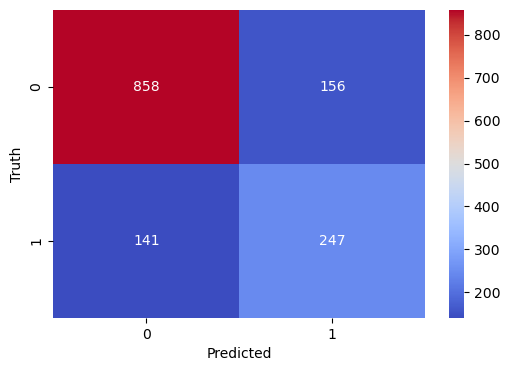

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')